In [1]:
# Imported Libraries
## Graphing/Plotting the Images 
%matplotlib inline
import matplotlib.pyplot as plt
## Matrix operations
import numpy as np
from numpy.linalg import matrix_rank
from numpy.linalg import svd
## Image library
from PIL import Image

import os

In [46]:

def SVD_Image_Compression(file_loc, color_map, folder_name, file_name):
    # Opens the image
    im = Image.open(file_loc)
    # Transform the image to a gray-scale image
    im_matrix = np.array(list(im.getdata(band=0)), float)
    im_matrix.shape = (im.size[1], im.size[0])
    im_matrix = np.matrix(im_matrix)
    
    # Obtains the Rank of the Matrix. 
    # This is also the number of singular values since 
    # Sigma is a diagonal matrix of singular values 
    # so r also controlls the number of columns
    r = matrix_rank(im_matrix)

    # Calculate the SVD
    U, sigma, V = np.linalg.svd(im_matrix, full_matrices=True)
    
    # A list of various ranks
    
    R = map(int, [r, r/2, 200*(r/r), 100*(r/r), 50*(r/r), 40*(r/r), 
                  30*(r/r), 20*(r/r), 10*(r/r), 5*(r/r), r/r])

    for i in R:
        reconstruct = np.matrix(U[:, :i]) * np.diag(sigma[:i])*np.matrix(V[:i, :])
        #title = "rank = %s" % i
        #plt.title(title)
        plt.imshow(reconstruct, cmap= color_map)
        plt.axis("off")
        
        
        # Saves each image
        file_path = "Saved_image/"
        
        newpath = file_path + folder_name 
        if not os.path.exists(newpath):
            os.makedirs(newpath)
        
        matrix = file_path + folder_name + "/" + file_name + str(i)+ ".jpg"
        
        plt.savefig(matrix, bbox_inches='tight')

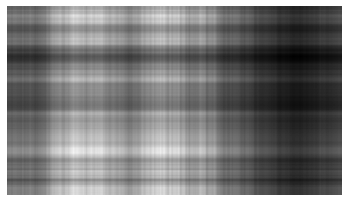

In [47]:
# Barry Glacier Image Compression using SVD
SVD_Image_Compression(file_loc = "Digital Image/Barry Glacier.jpg", 
                      color_map = "gray", 
                      folder_name = "Barry_Glacier_IM_SVD", 
                      file_name = "BarryGlacier_Rank")

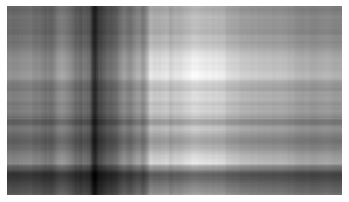

In [48]:
# Mendenhall Glacier Image Compression using SVD
SVD_Image_Compression(file_loc = "Digital Image/Mendenhall Glacier and I.jpg", 
                      color_map = "gray", 
                      folder_name = "Mendenhall_Glacier_IM_SVD", 
                      file_name = "MendenhallGlacier_Rank")


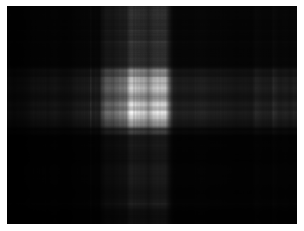

In [49]:
# Image Compression using SVD of a Macro Flower Picture I took
SVD_Image_Compression(file_loc = "Digital Image/Flower Macro #1.jpg", 
                      color_map = "gray", 
                      folder_name = "Flower_Macro_IM_SVD", 
                      file_name = "FlowerMacro_Rank")

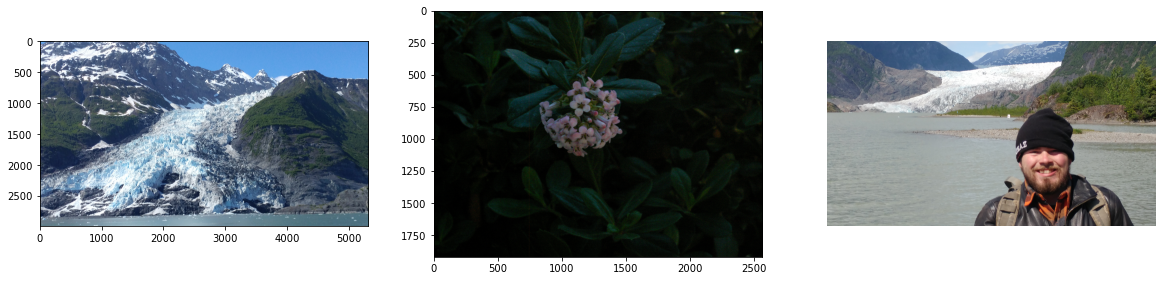

In [14]:
# Color Photos we used all together
Image1 = Image.open("Digital Image/Barry Glacier.jpg")
Image2 = Image.open("Digital Image/Mendenhall Glacier and I.jpg")
Image3 = Image.open("Digital Image/Flower Macro #1.jpg")

Image2 = Image2.rotate(180)

rows = 1
columns = 3

fig = plt.figure(figsize=(20,10))

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis("off")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image3)
plt.axis("off")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image2)
plt.axis("off");

plt.savefig("MATH152_final_GlenMartin_Latex/ex_photos_color.jpg", bbox_inches='tight')



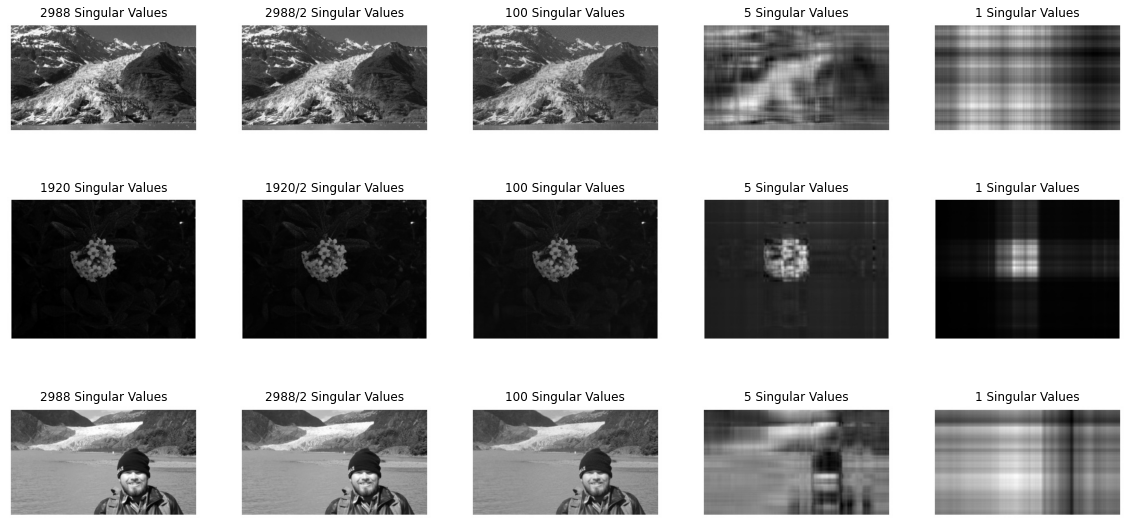

In [15]:
# Creates a figure of a comparison of the singular values in an image

Glacier1 = Image.open("Saved_image/Barry_Glacier_IM_SVD/BarryGlacier_Rank2988.jpg")
Glacier2 = Image.open("Saved_image/Barry_Glacier_IM_SVD/BarryGlacier_Rank1494.jpg")
Glacier3 = Image.open("Saved_image/Barry_Glacier_IM_SVD/BarryGlacier_Rank100.jpg")
Glacier4 = Image.open("Saved_image/Barry_Glacier_IM_SVD/BarryGlacier_Rank5.jpg")
Glacier5 = Image.open("Saved_image/Barry_Glacier_IM_SVD/BarryGlacier_Rank1.jpg")

Fowler1 = Image.open("Saved_image/Flower_Macro_IM_SVD/FlowerMacro_Rank1920.jpg")
Fowler2 = Image.open("Saved_image/Flower_Macro_IM_SVD/FlowerMacro_Rank960.jpg")
Fowler3 = Image.open("Saved_image/Flower_Macro_IM_SVD/FlowerMacro_Rank100.jpg")
Fowler4 = Image.open("Saved_image/Flower_Macro_IM_SVD/FlowerMacro_Rank5.jpg")
Fowler5 = Image.open("Saved_image/Flower_Macro_IM_SVD/FlowerMacro_Rank1.jpg")

Me1 = Image.open("Saved_image/Mendenhall_Glacier_IM_SVD/MendenhallGlacier_Rank2988.jpg").rotate(180)
Me2 = Image.open("Saved_image/Mendenhall_Glacier_IM_SVD/MendenhallGlacier_Rank1494.jpg").rotate(180)
Me3 = Image.open("Saved_image/Mendenhall_Glacier_IM_SVD/MendenhallGlacier_Rank100.jpg").rotate(180)
Me4 = Image.open("Saved_image/Mendenhall_Glacier_IM_SVD/MendenhallGlacier_Rank5.jpg").rotate(180)
Me5 = Image.open("Saved_image/Mendenhall_Glacier_IM_SVD/MendenhallGlacier_Rank1.jpg").rotate(180)

rows = 3
columns = 5

fig = plt.figure(figsize=(20,10))

fig.add_subplot(rows, columns, 1)
plt.title("2988 Singular Values")
plt.imshow(Glacier1)
plt.axis("off")


fig.add_subplot(rows, columns, 2)
plt.title("2988/2 Singular Values")
plt.imshow(Glacier2)
plt.axis("off")

fig.add_subplot(rows, columns, 3)
plt.title("100 Singular Values")
plt.imshow(Glacier3)
plt.axis("off")

fig.add_subplot(rows, columns, 4)
plt.title("5 Singular Values")
plt.imshow(Glacier4)
plt.axis("off")

fig.add_subplot(rows, columns, 5)
plt.title("1 Singular Values")
plt.imshow(Glacier5)
plt.axis("off")

fig.add_subplot(rows, columns, 6)
plt.title("1920 Singular Values")
plt.imshow(Fowler1)
plt.axis("off")

fig.add_subplot(rows, columns, 7)
plt.title("1920/2 Singular Values")
plt.imshow(Fowler2)
plt.axis("off")

fig.add_subplot(rows, columns, 8)
plt.title("100 Singular Values")
plt.imshow(Fowler3)
plt.axis("off")

fig.add_subplot(rows, columns, 9)
plt.title("5 Singular Values")
plt.imshow(Fowler4)
plt.axis("off")

fig.add_subplot(rows, columns, 10)
plt.title("1 Singular Values")
plt.imshow(Fowler5)
plt.axis("off")

fig.add_subplot(rows, columns, 11)
plt.title("2988 Singular Values")
plt.imshow(Me1)
plt.axis("off")

fig.add_subplot(rows, columns, 12)
plt.title("2988/2 Singular Values")
plt.imshow(Me2)
plt.axis("off")

fig.add_subplot(rows, columns, 13)
plt.title("100 Singular Values")
plt.imshow(Me3)
plt.axis("off")

fig.add_subplot(rows, columns, 14)
plt.title("5 Singular Values")
plt.imshow(Me4)
plt.axis("off")

fig.add_subplot(rows, columns, 15)
plt.title("1 Singular Values")
plt.imshow(Me5)
plt.axis("off");

plt.savefig("MATH152_final_GlenMartin_Latex/ex_contrast.jpg", bbox_inches='tight')
